In [159]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [160]:
girls = pd.read_excel('most_liked.xlsx', delimiter=',')

In [161]:
girls.head()

,Age,white,black,good_smile,skinny,not_skinny,education,passion,years_index,friend,like_index
0,15,1,0,1,0,1,0,1,10,1,10
1,15,1,0,0,0,1,0,0,5,0,1
2,15,1,0,0,0,1,1,0,5,1,3
3,15,1,0,0,0,1,1,0,5,1,3
4,15,1,0,1,1,0,1,0,5,0,8


In [162]:
girls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 11 columns):
Age            14 non-null int64
white          14 non-null int64
black          14 non-null int64
good_smile     14 non-null int64
skinny         14 non-null int64
not_skinny     14 non-null int64
education      14 non-null int64
passion        14 non-null int64
years_index    14 non-null int64
friend         14 non-null int64
like_index     14 non-null int64
dtypes: int64(11)
memory usage: 1.3 KB


## Preprocessing Data

In [163]:
bins = (-2, 2, 3, 5, 7, 9, 11)
group_names = ['Hated', 'Not Intrested', 'Normal', 'Intresting', 'Likes', 'Loved']
girls['like_index'] = pd.cut(girls['like_index'], bins = bins, labels = group_names)

In [164]:
girls['like_index'].value_counts()

Likes            4
Not Intrested    4
Normal           3
Hated            2
Loved            1
Intresting       0
Name: like_index, dtype: int64

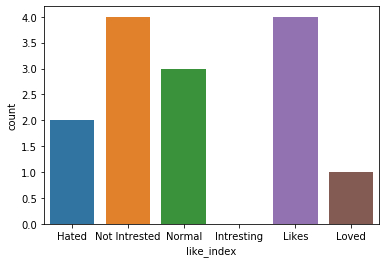

In [165]:
sns.countplot(girls['like_index'])

### Now seperate the dataset as response variable and feature variables

In [166]:
X = girls.drop('like_index', axis=1)
y = girls['like_index']

In [167]:
y

0             Loved
1             Hated
2     Not Intrested
3     Not Intrested
4             Likes
5     Not Intrested
6     Not Intrested
7            Normal
8             Hated
9             Likes
10            Likes
11           Normal
12           Normal
13            Likes
Name: like_index, dtype: category
Categories (6, object): [Hated < Not Intrested < Normal < Intresting < Likes < Loved]

## Train and Test Splitting of data

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train

,Age,white,black,good_smile,skinny,not_skinny,education,passion,years_index,friend
4,15,1,0,1,1,0,1,0,5,0
7,15,1,0,1,0,1,2,0,5,0
10,15,1,0,1,0,1,2,1,2,1
5,15,0,1,0,0,1,0,0,5,0
1,15,1,0,0,0,1,0,0,5,0
13,15,0,1,1,1,0,3,1,5,1
9,15,0,1,1,0,1,1,0,1,0
6,15,0,1,1,0,1,2,0,5,0
3,15,1,0,0,0,1,1,0,5,1
12,15,0,1,0,1,0,2,0,5,0


## Applying Standard scaling to get optimized result

# Random FOrest Classifier

In [169]:
rfc = RandomForestClassifier(n_estimators=10)

In [170]:
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [171]:
pred_rfc

array(['Hated', 'Likes', 'Not Intrested'], dtype=object)

## Let's see how our model Performs

In [172]:
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

               precision    recall  f1-score   support

        Hated       1.00      1.00      1.00         1
        Likes       0.00      0.00      0.00         0
       Normal       0.00      0.00      0.00         1
Not Intrested       1.00      1.00      1.00         1

     accuracy                           0.67         3
    macro avg       0.50      0.50      0.50         3
 weighted avg       0.67      0.67      0.67         3

[[1 0 0 0]
 [0 0 0 0]
 [0 1 0 0]
 [0 0 0 1]]


/home/sandaru/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sandaru/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/sandaru/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sandaru/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/sa

### Accuracy Scorer

In [173]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_rfc)
cm

0.6666666666666666

In [174]:
girls.head(20)

,Age,white,black,good_smile,skinny,not_skinny,education,passion,years_index,friend,like_index
0,15,1,0,1,0,1,0,1,10,1,Loved
1,15,1,0,0,0,1,0,0,5,0,Hated
2,15,1,0,0,0,1,1,0,5,1,Not Intrested
3,15,1,0,0,0,1,1,0,5,1,Not Intrested
4,15,1,0,1,1,0,1,0,5,0,Likes
5,15,0,1,0,0,1,0,0,5,0,Not Intrested
6,15,0,1,1,0,1,2,0,5,0,Not Intrested
7,15,1,0,1,0,1,2,0,5,0,Normal
8,15,1,0,0,0,1,1,0,5,0,Hated
9,15,0,1,1,0,1,1,0,1,0,Likes


In [178]:
Xnew = [[15, 1, 0, 1, 0, 1, 0, 1, 10, 0 ]]

In [180]:
Xnew = sc.transform(Xnew)
ynew = rfc.predict(Xnew)
ynew

array(['Likes'], dtype=object)